<a href="https://colab.research.google.com/github/pkenil96/ComputerVisionTasks/blob/main/image-classification-hog-svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Classification'

/content/gdrive/MyDrive/Colab Notebooks/Classification


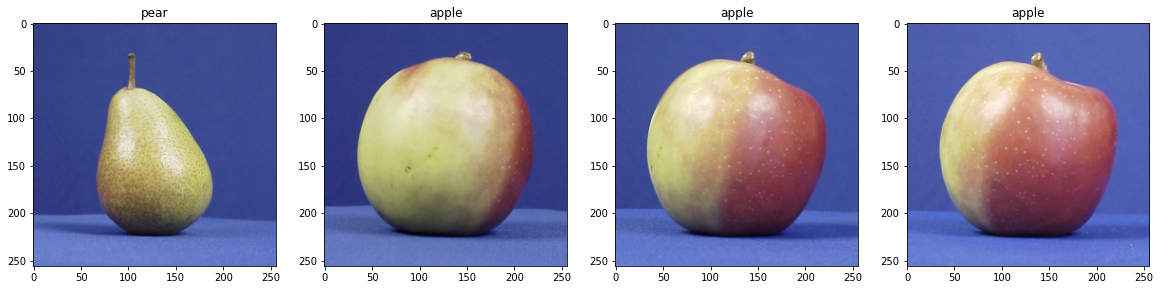

In [4]:
# loading the images into training and testing set
img_dir = 'Images/'

categories = [category for category in os.listdir(img_dir)]
# print(categories) --> ['pear', 'apple']

category_label = {0: 'pear', 1: 'apple'}

train_filenames = []
test_filenames = []

for category in categories:
    train_filenames.extend([os.path.join(img_dir, category, 'train', img) for img in os.listdir(os.path.join(img_dir, category, 'train'))])

for category in categories:
    test_filenames.extend([os.path.join(img_dir, category, 'test', img) for img in os.listdir(os.path.join(img_dir, category, 'test'))])

train_set_size = len(train_filenames)
test_set_size = len(test_filenames)

train_images = np.empty(train_set_size, dtype=object)
train_labels = []

test_images = np.empty(test_set_size, dtype=object)
test_labels = []

for index, image in enumerate(train_filenames):
    train_labels.append(0 if categories[0] in image else 1)
    img = cv2.imread(image, 1)
    train_images[index] = cv2.imread(image, 1)

for index, image in enumerate(test_filenames):
    test_labels.append(0 if categories[0] in image else 1)
    img = cv2.imread(image, 1)
    test_images[index] = cv2.imread(image, 1)

# cv2_imshow(train_images[np.random.randint(0, len(train_images))])

# display four random images from training set
# using plt.subplot() to display images in grid
f, axarr = plt.subplots(1, 4, figsize = (20, 8))
for i in range(4):
    # cv2 stores image in BGR while matplotlib stores it in RGB
    # [:, :, ::-1] reverses the array so that BGR gets converted to RGB #todo - How?
    rand_num = np.random.randint(0, train_set_size)
    axarr[i].imshow(train_images[rand_num][:,:,::-1])
    axarr[i].set_title(category_label[train_labels[rand_num]])

opencv - BGR format, 
matplotlib - RGB format

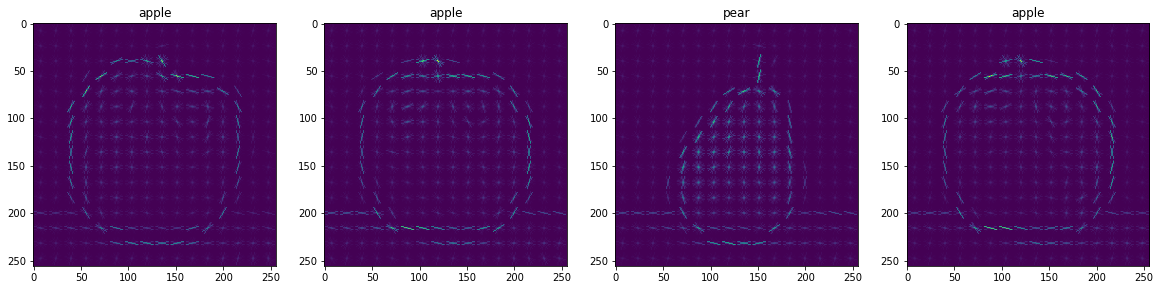

In [5]:
# now we compute hog features for the training set
def compute_hog_features(image):
    # this function returns the hog feature descriptor vector and hog image for image
    feature_descriptor, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True)
    return feature_descriptor, hog_image

hog_feature_descriptors_train = []
hog_images_train = np.empty(train_set_size, dtype=object)
for index, image in enumerate(train_images):
    feature_descriptor, hog_image = compute_hog_features(image)
    hog_feature_descriptors_train.append(feature_descriptor)
    hog_images_train[index] = hog_image

hog_feature_descriptors_test = []
hog_images_test = np.empty(test_set_size, dtype=object)
for index, image in enumerate(test_images):
    feature_descriptor, hog_image = compute_hog_features(image)
    hog_feature_descriptors_test.append(feature_descriptor)
    hog_images_test[index] = hog_image

# displaying 4 random hog images

hog_feature_descriptors_train = np.array(hog_feature_descriptors_train)
f, axarr = plt.subplots(1, 4, figsize = (20, 8))
for i in range(4):
    rand_num = np.random.randint(0, train_set_size)
    axarr[i].imshow(hog_images_train[rand_num])
    axarr[i].set_title(category_label[train_labels[rand_num]])

In [6]:
# now we feed the hog_feature_descriptor and its corresponding label to the svm classifier
classifier = svm.LinearSVC()
classifier.fit(hog_feature_descriptors_train, train_labels)

# shuffling the test data
initial_state = np.random.get_state()
np.random.shuffle(hog_feature_descriptors_test)

np.random.set_state(initial_state)
np.random.shuffle(test_labels)

np.random.set_state(initial_state)
np.random.shuffle(hog_images_test)

np.random.set_state(initial_state)
np.random.shuffle(test_images)

predictions = classifier.predict(hog_feature_descriptors_test)

print(accuracy_score(test_labels, predictions) * 100)

100.0


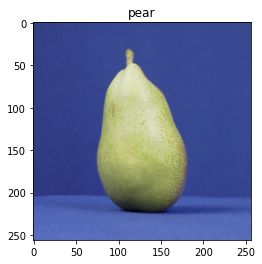

In [7]:
# predicted label of random image from test data
rand_index = np.random.randint(0, len(test_images))
random_test_image = test_images[rand_index]
predicted_label = predictions[rand_index]

imgplot = plt.imshow(random_test_image[:, :, ::-1])
plt.title(category_label[predicted_label])
plt.show()